# **Thank You for opening this notebook!!!**
## **If you find this notebook useful then please upvote.**

# Introduction to Exploritary Data Analysis
Analyzing a dataset typically involves several key steps :
1. [Step 0: Imports and Reading data](#1)
2. [Step 1: data Understanding](#2)
3. [Step 2: data Prep](#3)
4. [Step 3: Feature Understanding](#4)
5. [Step 4: Feature Relationships](#5)
6. [Step 5: Analyse Hypothese](#6)
7. [Step 6: data Cleaning](#7)
8. [Step 7: Model Building (If Applicable):](#8)
9. [Step 8: Model Evaluation:](#9)
10. [Step 9: Make Pipline:](#10)
11. [Step 10: Feature Engineering:](#11)
12. [Step 11: Feature Scalling:](#12)


# [Step 0: Imports and Reading data]()<a id="1"></a> <br>

In [360]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as sc
import statistics as st
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
# plt.style.use('dark_background')
plt.style.use('ggplot')

data = pd.read_csv('D:\Paractical data scientist\Red Wine classification\winequality-red.csv')
df = data.copy()

# [Step 1: data Understanding]()<a id="2"></a> <br>
- Analysis the shape : We'll just focus on the form of data : Ndr of rows & columns : (150, 5)

In [361]:
df.drop_duplicates(inplace = True)
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

In [362]:
df.shape  

(1359, 12)

In [363]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

<Axes: ylabel='proportion'>

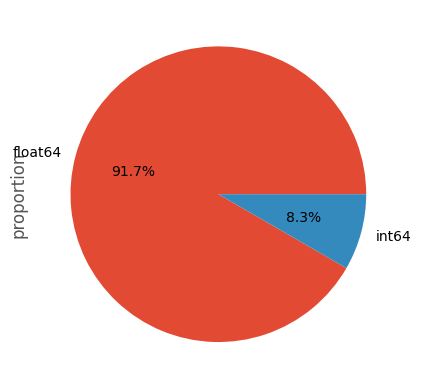

In [364]:
plt.figure()
df.dtypes.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

# [Step 2: data Preperation]()<a id="3"></a> <br>

- Dropping irrelevant columns and rows

<Axes: >

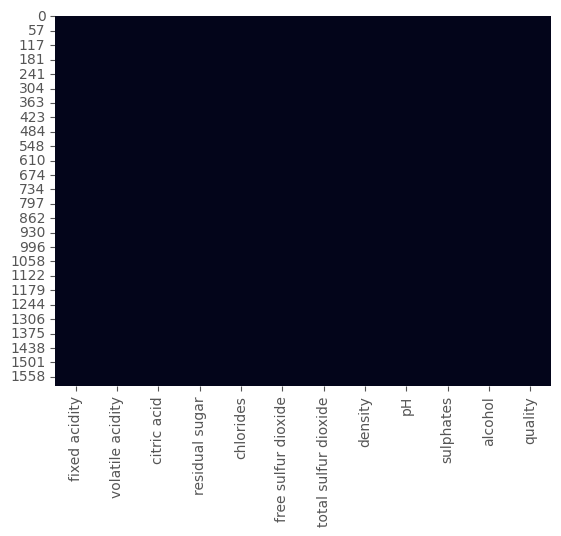

In [365]:
sns.heatmap(df.isnull(), cbar=False)

- - Cleaning Column

In [366]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
df['quality'] = df['quality'].astype(str)


# [Step 3: Feature Understanding]()<a id="4"></a> <br>

- - Analyse target : (reg or classif) / (variables type:'numerical' or 'categorical') / (equilibre or not) classif non equilibre 10% of var1

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_10920\2770989439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chains,y=chains.index,palette='deep')


Text(0.5, 0, 'Count')

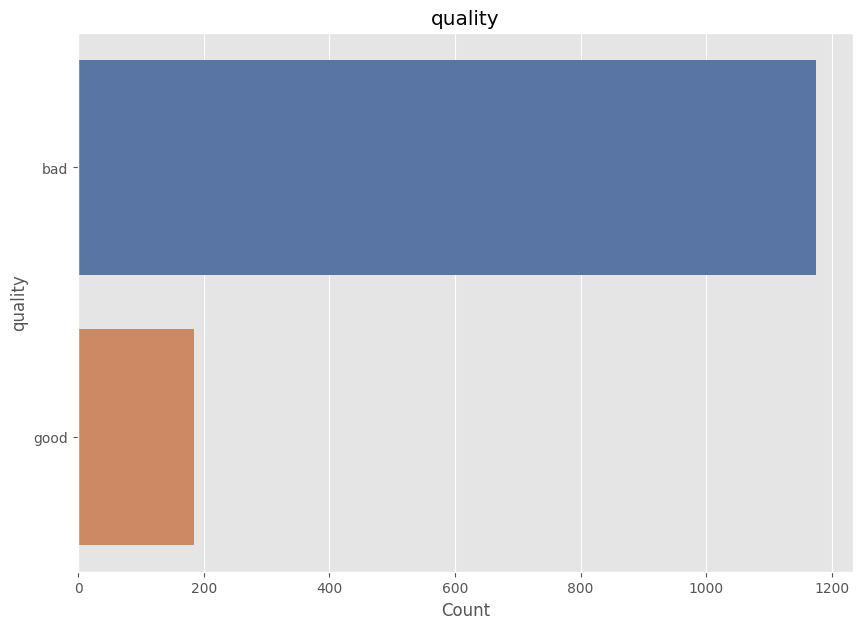

In [367]:
plt.figure(figsize=(10,7))
chains=df['quality'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("quality")
plt.xlabel("Count")

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

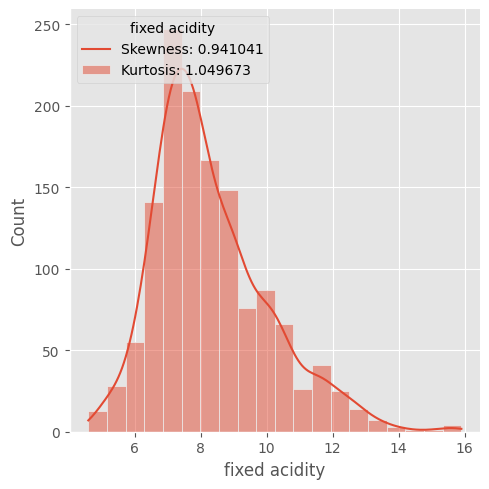

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

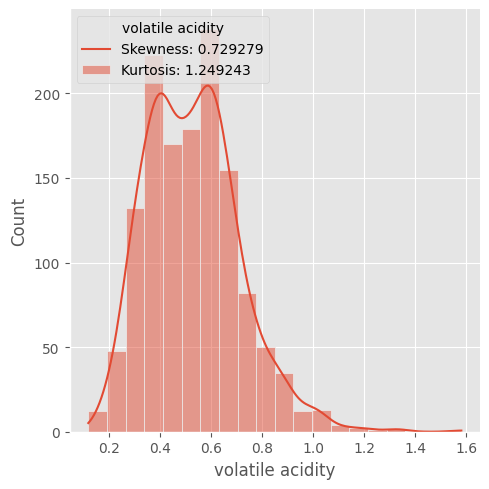

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

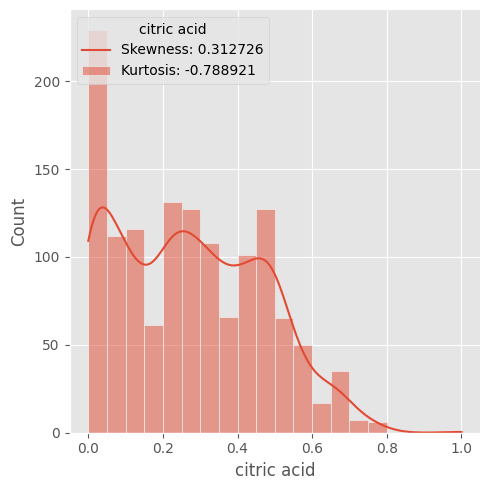

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

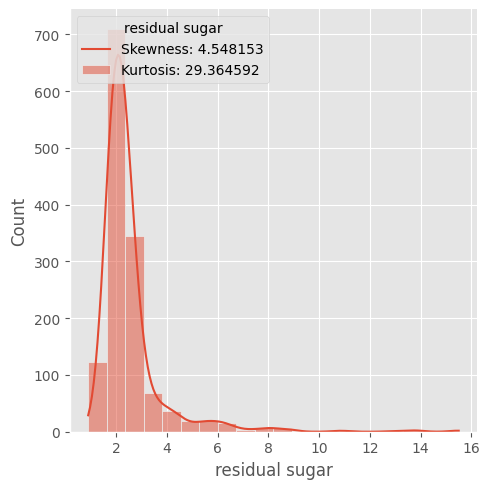

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

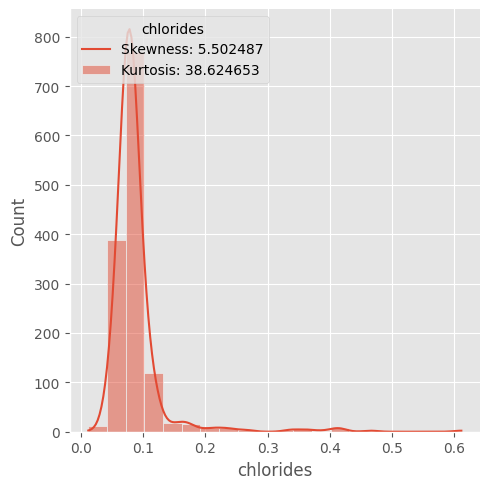

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

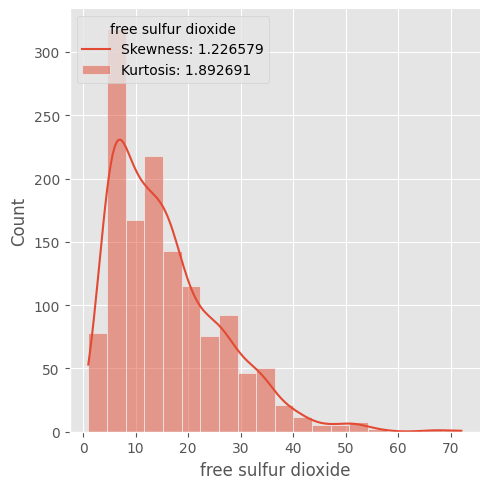

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

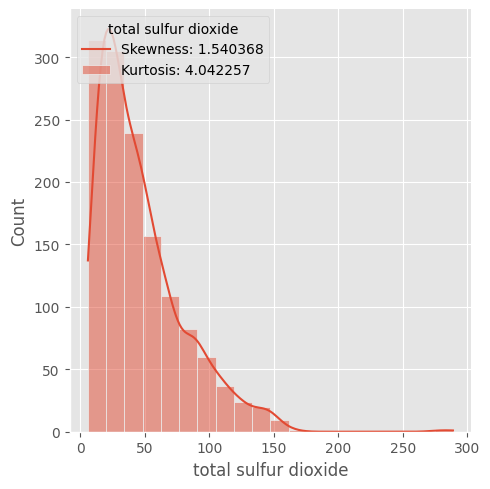

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

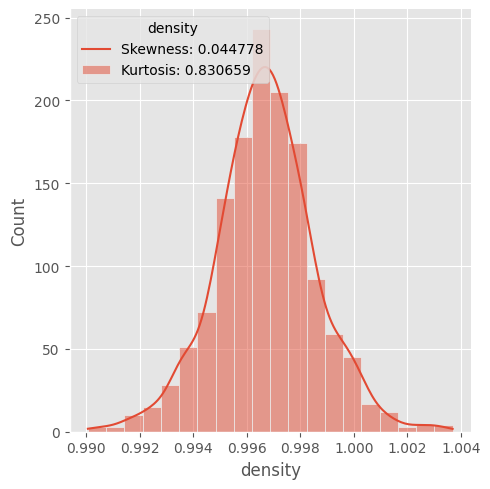

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

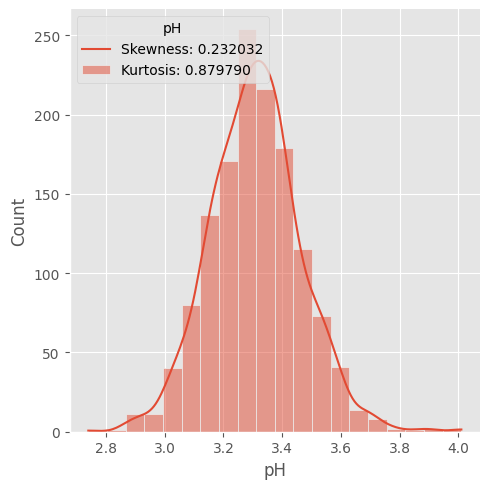

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

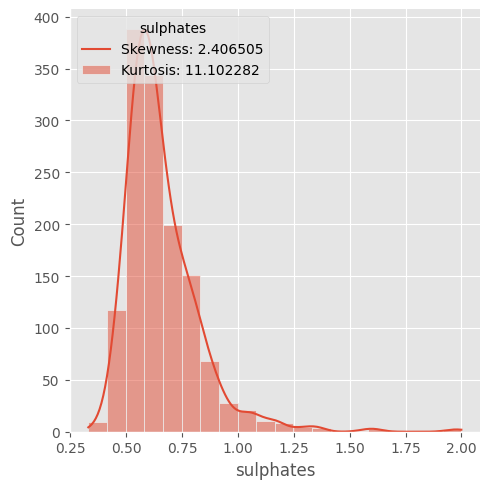

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

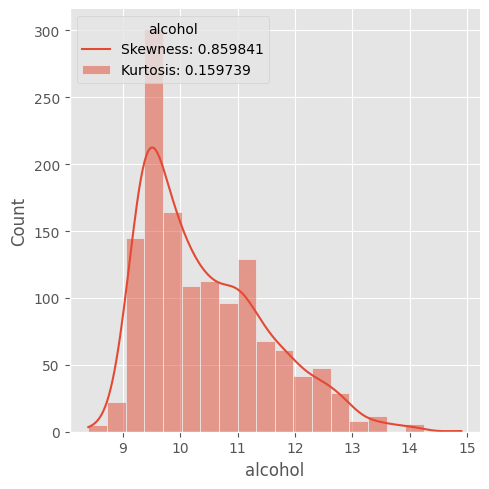

In [368]:
for col in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(6,5))
    ax = sns.displot(df, x=col,kde=True ,bins=20)
    plt.legend(title=col, loc='upper left', labels=["Skewness: %f" % df[col].skew(),"Kurtosis: %f" % df[col].kurt()])
    plt.show(ax)

quality------------------------------------------- ['bad' 'good']


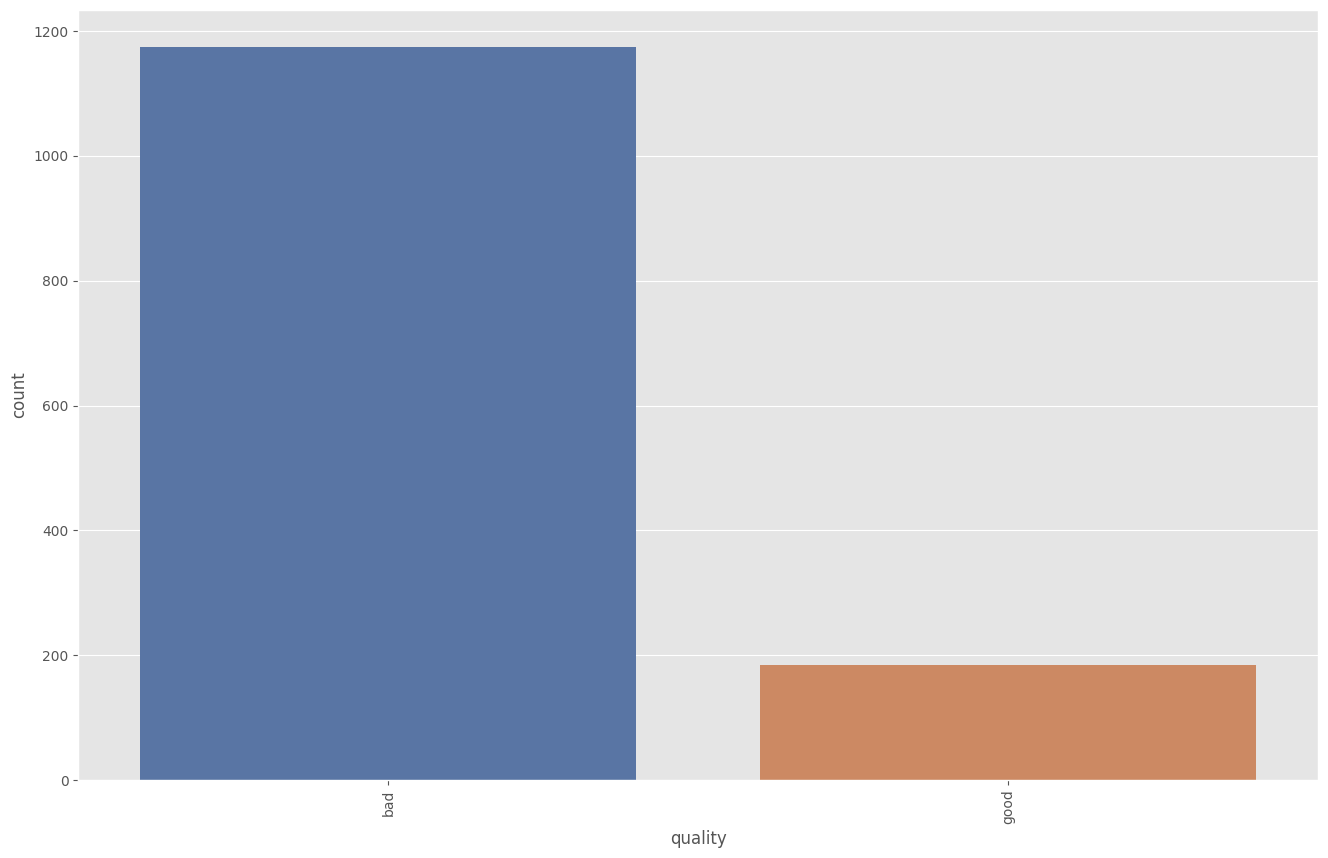

In [369]:
for col in df.select_dtypes(include='object'):
    print(f'{col :-<50} {df[col].unique()}')
    plt.figure(figsize = (16,10))
    ax = sns.countplot(x=df[col], hue=df[col], palette='deep', legend=False)
    plt.xticks(rotation=90)
    plt.show

- - Verifie outliers

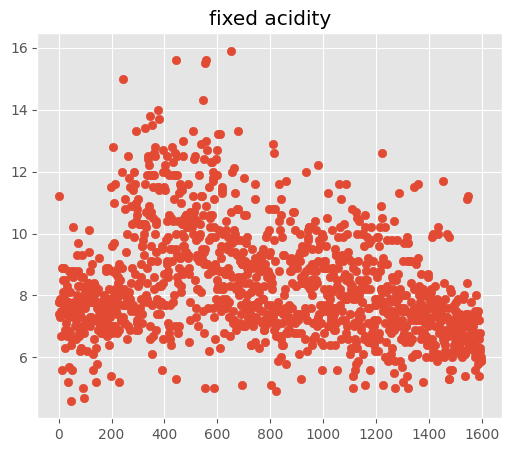

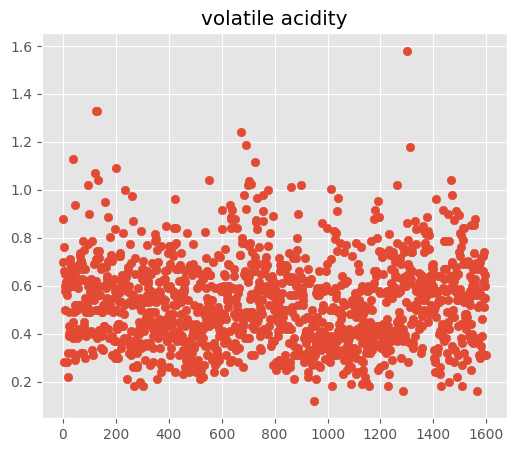

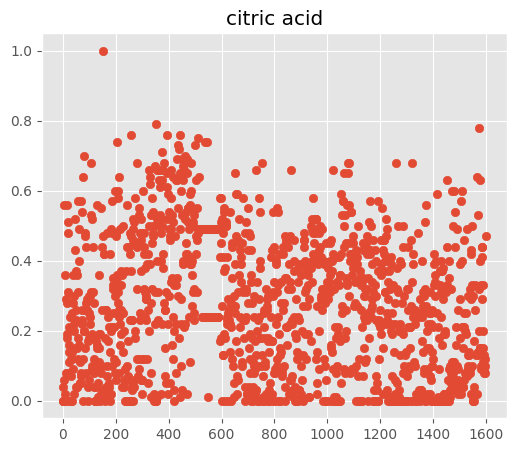

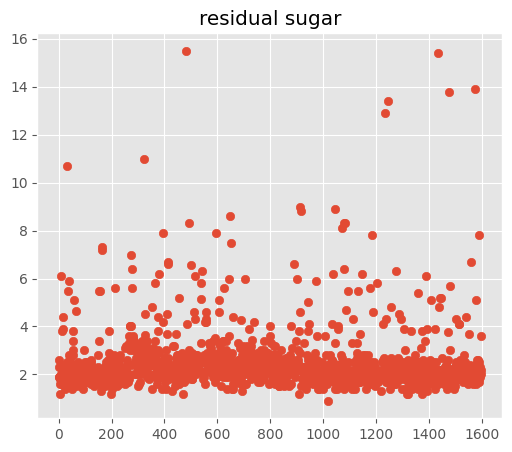

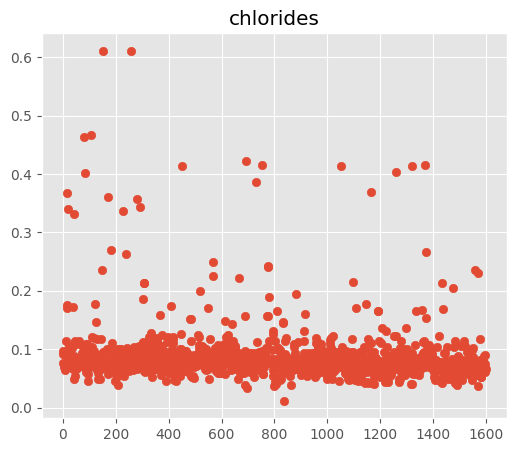

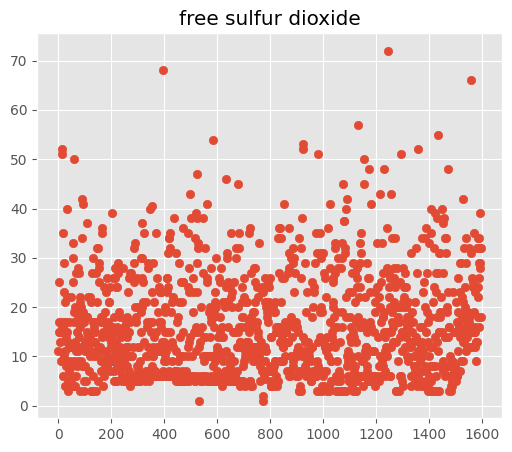

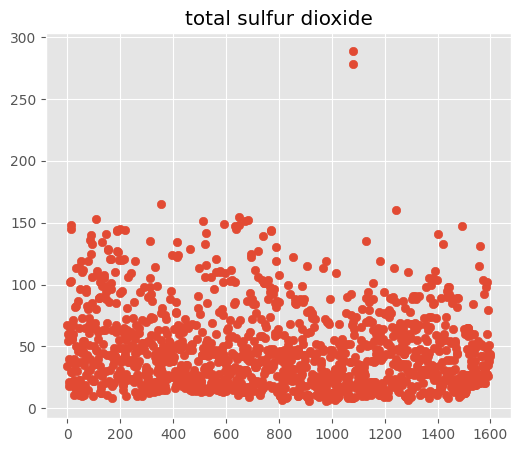

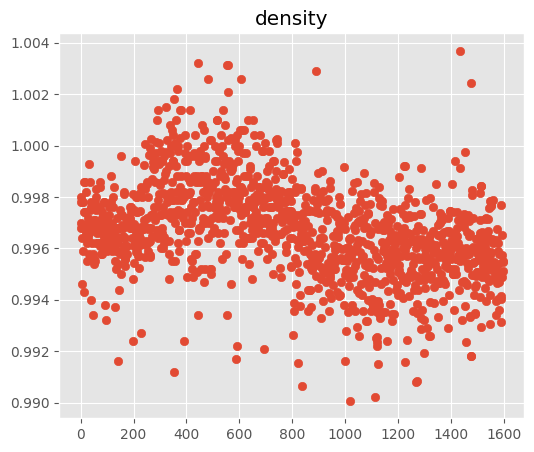

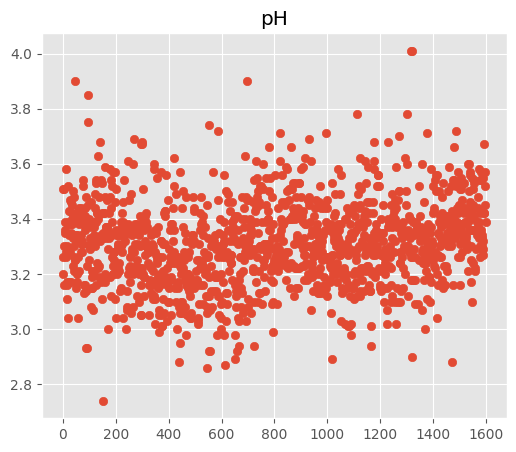

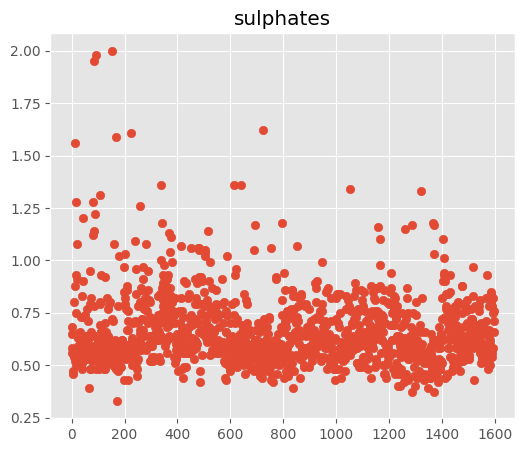

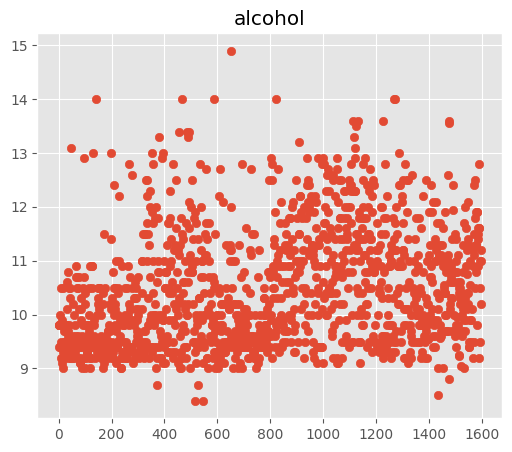

In [370]:
for col in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(6,5))
    ax = plt.scatter(df.index, df[col])
    plt.title(col)
    plt.show(ax)

In [371]:
df = df[(df['volatile acidity']<1.4)]
df = df[(df['citric acid']<0.8)]
df = df[(df['chlorides']<0.5)]
df = df[(df['free sulfur dioxide']<60)]
df = df[(df['total sulfur dioxide']<200)]
df = df[(df['sulphates']<1.75)]
df.shape

(1349, 12)

# [Step 4: Feature Relationships]()<a id="5"></a> <br>

- - Relation variables/variables : (Taux de corre variables/variables>0.9)

<Axes: >

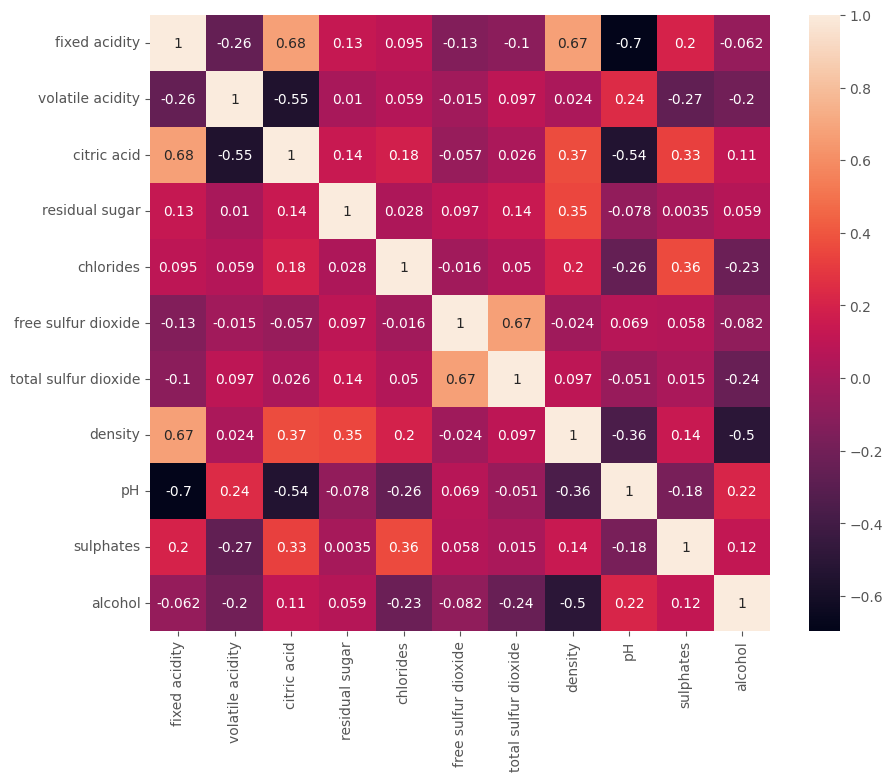

In [372]:
cols = list()
numeric_cols = df.select_dtypes(exclude='object').columns
df_corr = df[numeric_cols].dropna().corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True )

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


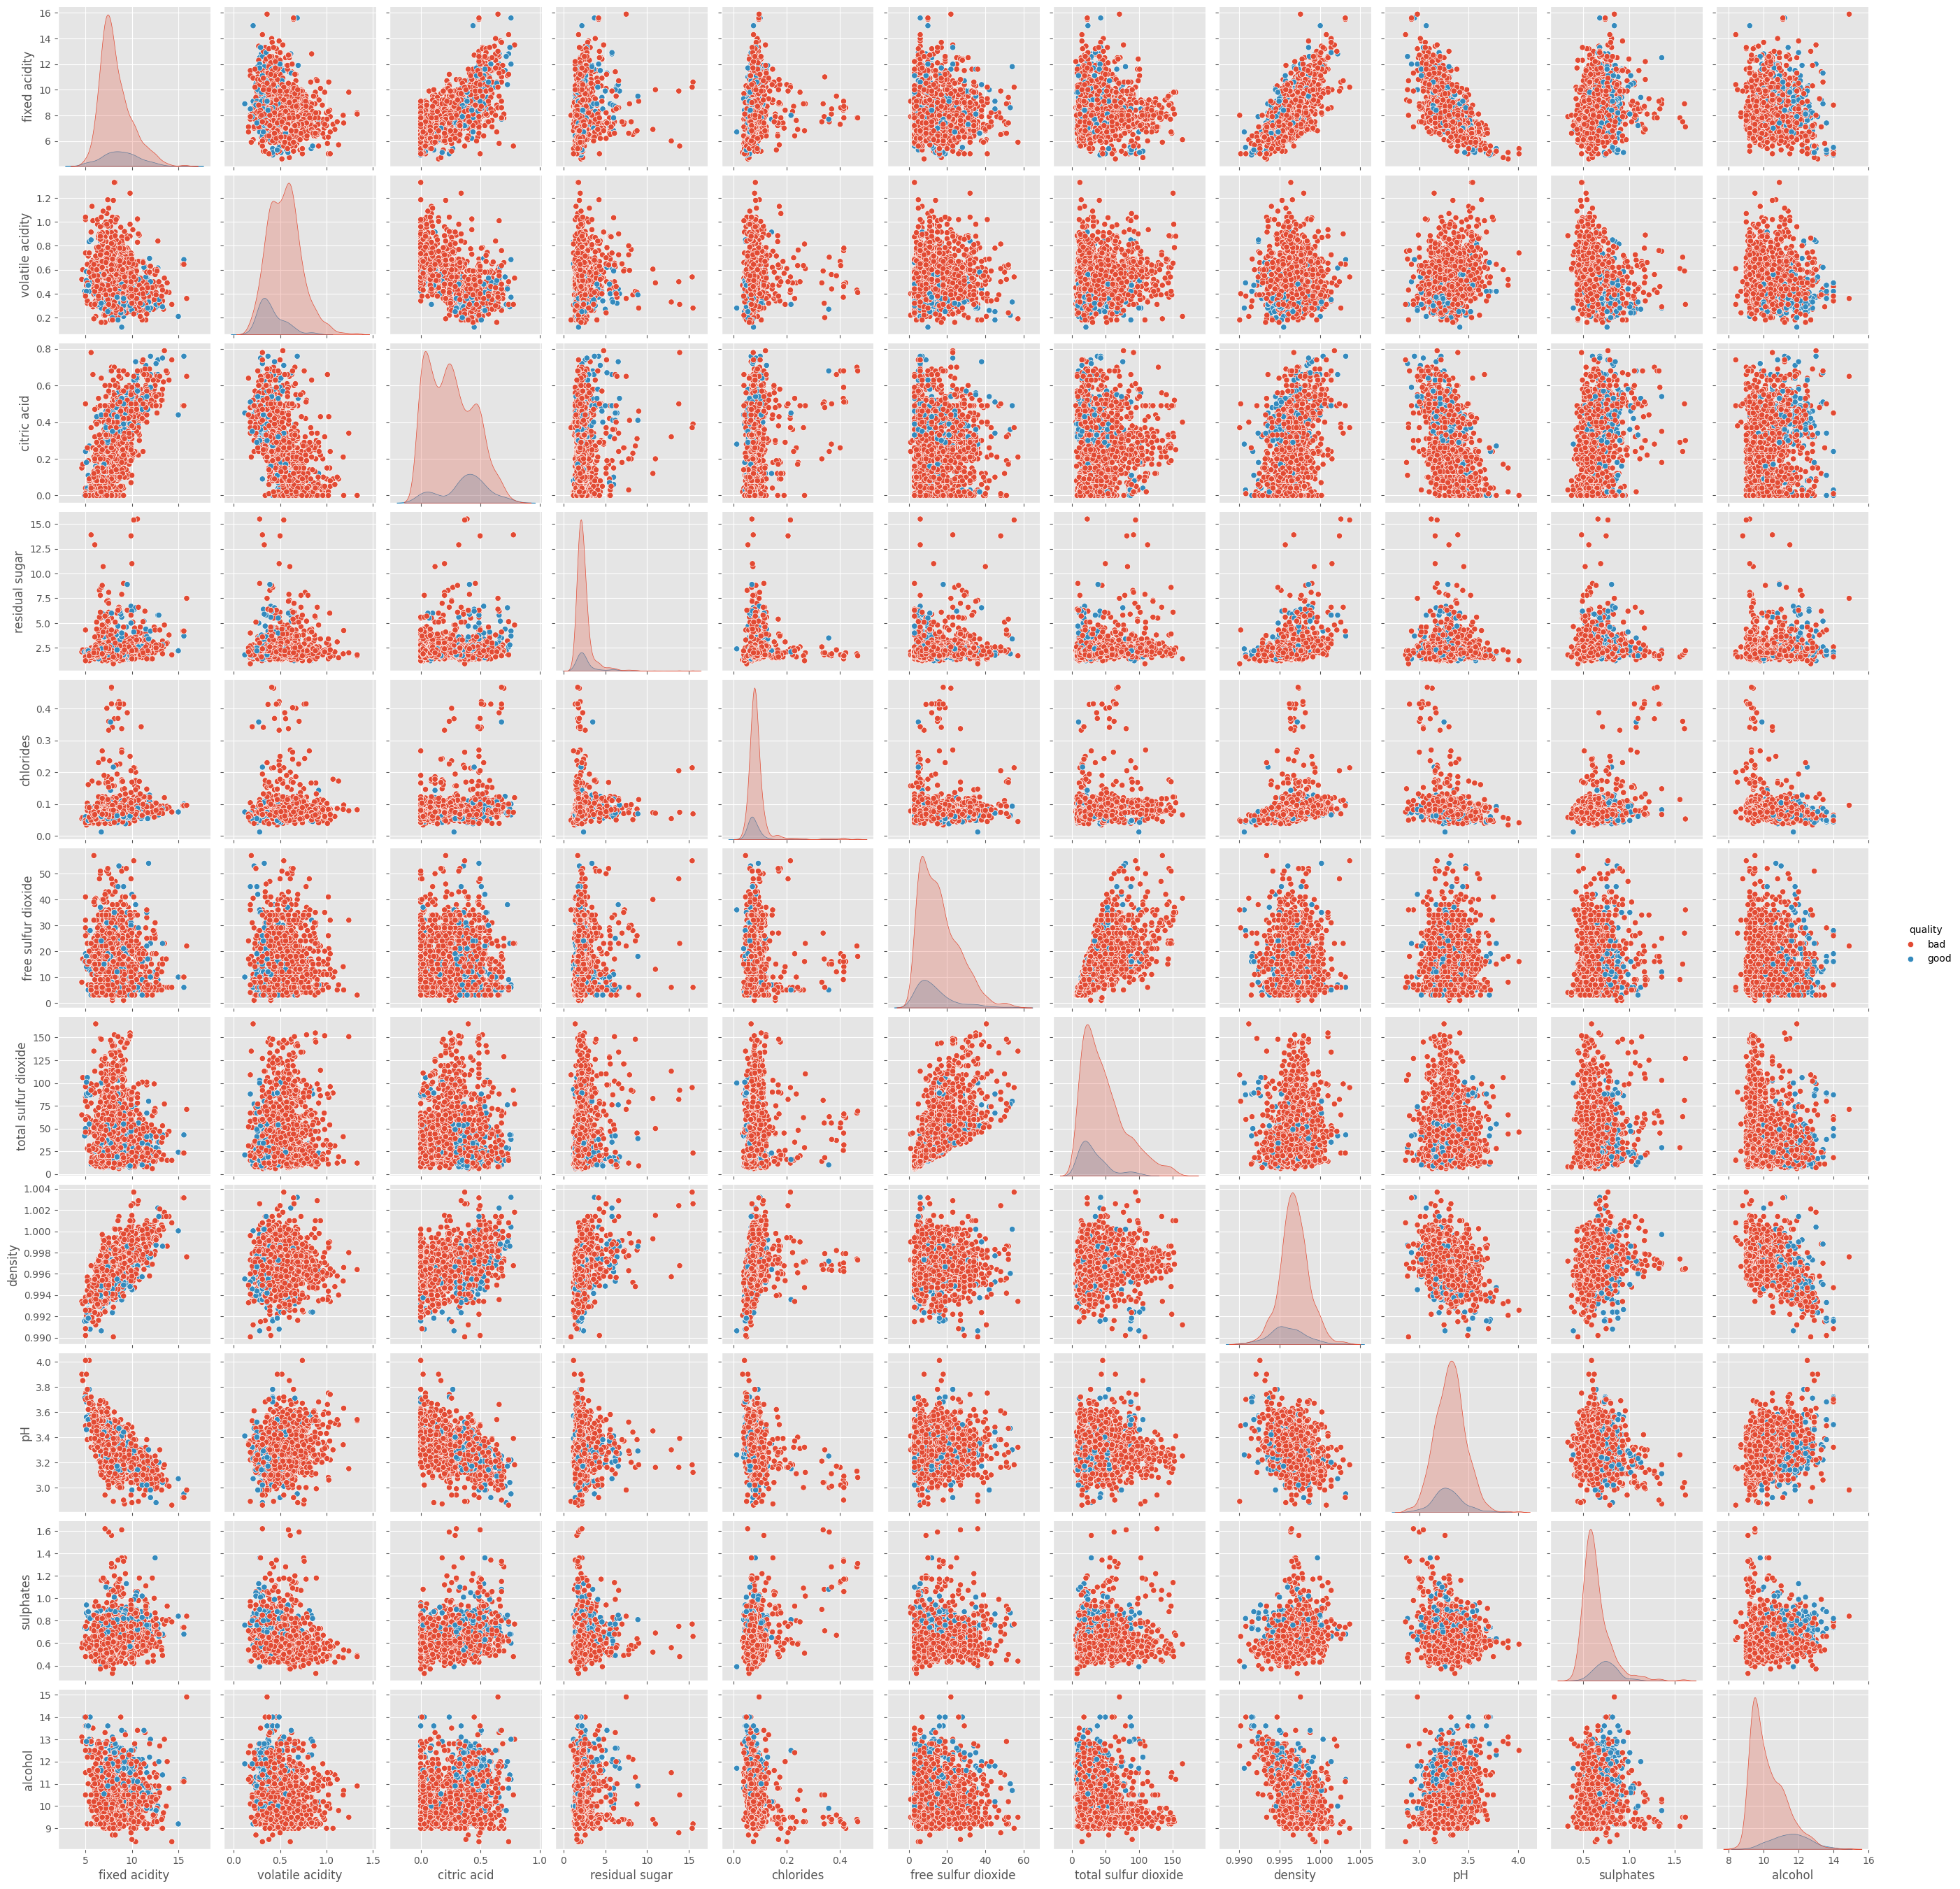

In [373]:
sns.pairplot(df, hue='quality')
plt.show()

- - Relation Target/Variables : (Taux corr variables/target >0.9) We ll try to understand how the target and other types variables relate.. 

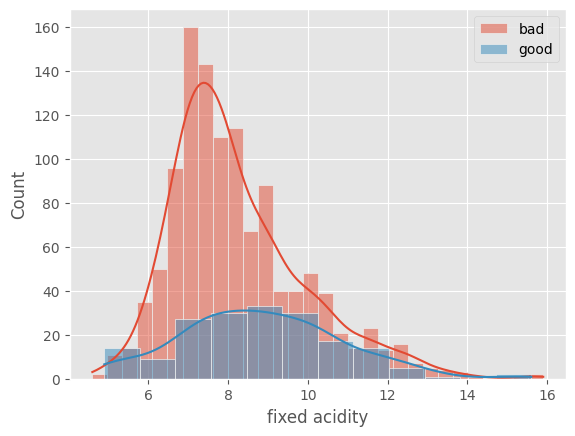

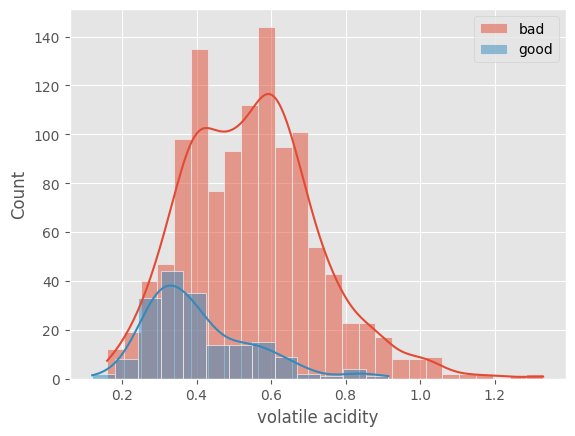

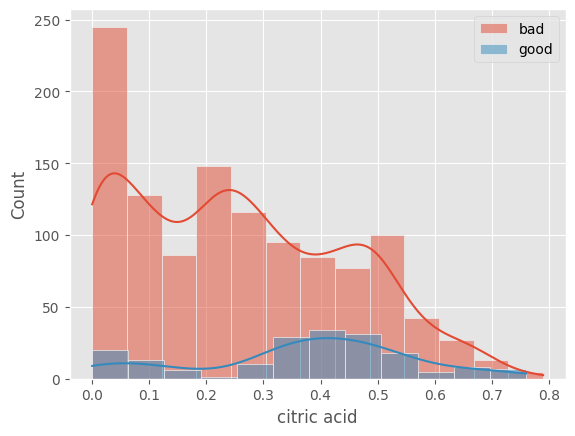

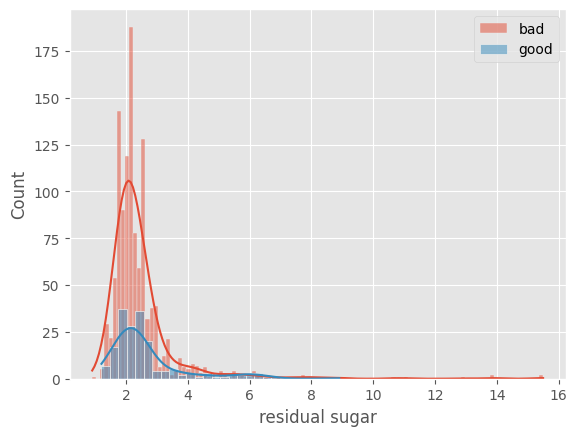

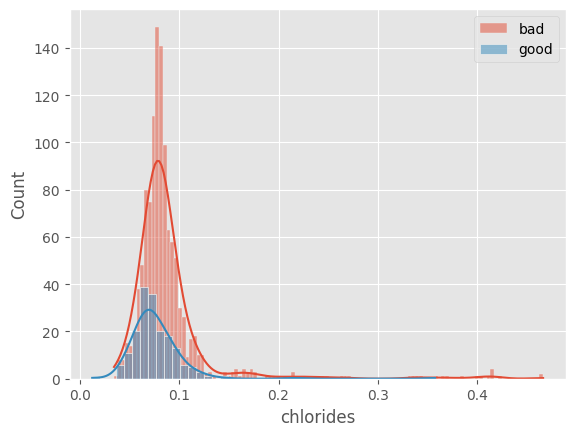

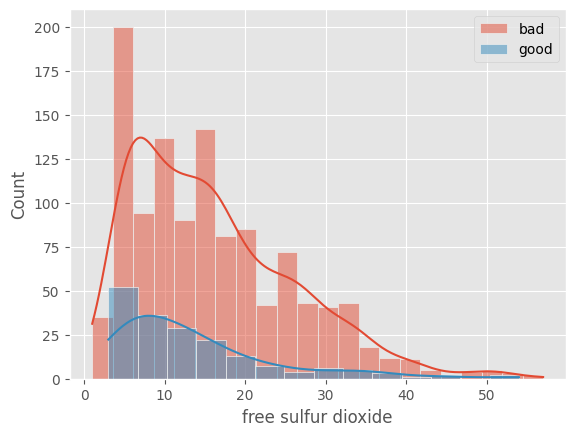

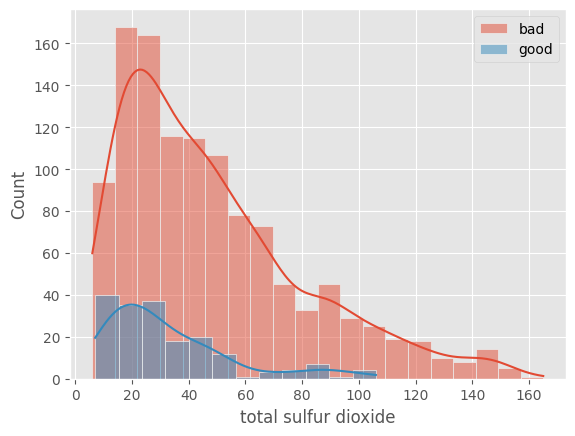

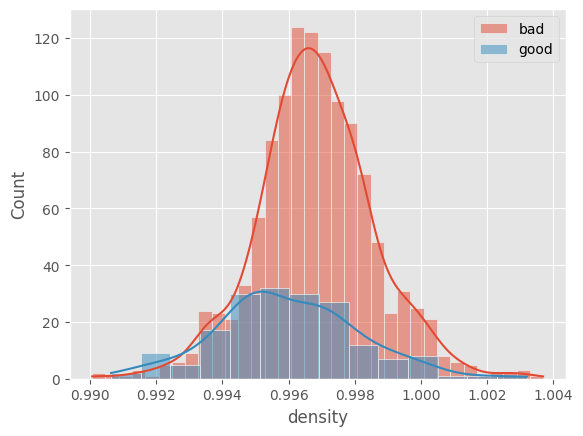

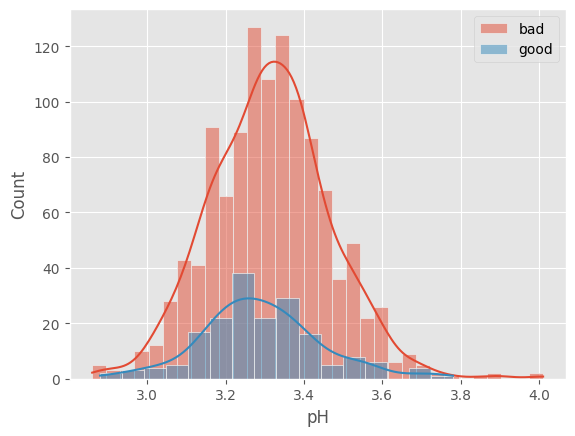

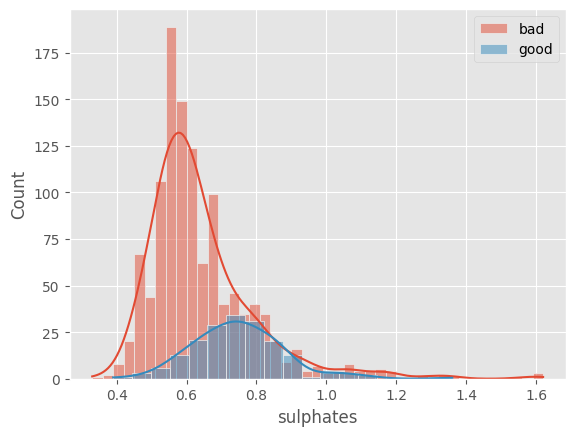

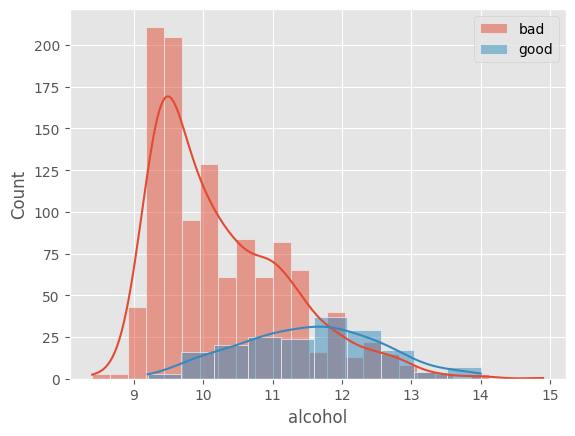

In [374]:
for col in df.select_dtypes(exclude=['object','int']):
    plt.figure()                                 
    for cat in df['quality'].unique():
        sns.histplot(df[df['quality']==cat][col],kde=True,label=cat)
    plt.legend()

# [Step 5: Analyse Hypothese]()<a id="6"></a> <br>

- - Rate of 'quality' depending to each col => prove if the rate of 'quality' are not equal

In [375]:
# calculate p for each column of test => compare p with alpha
from scipy.stats import ttest_ind                                                            
def t_test(col):
    alpha=0.02
    #=>array[True, False]           
    index_A=df['quality']=="bad"
    index_B=df['quality']=="good"    
    #=>Data_A=Data[rows['column_y']==A] 
    if pd.api.types.is_numeric_dtype(df[col]):
        Data_A = df[index_A]
        Data_B = df[index_B]
        # dropna for eliminating NaN values for the test
        stat, p = ttest_ind(Data_A[col].dropna(), Data_B[col].dropna())                           
        if p < alpha:
            return 'H0 Rejetée X'  # col has a rate not equal for 'column_y' => col has an impact on column_y
        else:
            return 'H0 Non Rejetée'  # col has no significant impact on column_y
    else:
        return 'Not Numeric'  # The column is not numeric   

for col in df.columns:
    print(f'{col :-<50} {t_test(col)}')

fixed acidity------------------------------------- H0 Rejetée X
volatile acidity---------------------------------- H0 Rejetée X
citric acid--------------------------------------- H0 Rejetée X
residual sugar------------------------------------ H0 Non Rejetée
chlorides----------------------------------------- H0 Rejetée X
free sulfur dioxide------------------------------- H0 Rejetée X
total sulfur dioxide------------------------------ H0 Rejetée X
density------------------------------------------- H0 Rejetée X
pH------------------------------------------------ H0 Non Rejetée
sulphates----------------------------------------- H0 Rejetée X
alcohol------------------------------------------- H0 Rejetée X
quality------------------------------------------- Not Numeric


- - fixed acidity
- - chlorides
- - density
- - sulphates

# [Step 6 : Data Cleaning]()<a id="7"></a> <br>

- Encodage : (Only for object column)

In [376]:
from sklearn.preprocessing import LabelEncoder
def encodage(data):
    cod_dict = {}
    for col in data.select_dtypes('object'):
        cod_dict[col] = LabelEncoder()
        print(cod_dict.keys())
        print('classed found : ' , list(cod_dict[col].fit(data[col]).classes_))
        #Create a label (category) encoder object
        data[col] = cod_dict[col].fit_transform(data[col])
        print('Updates dataframe is : \n' ,data )
    #for inverse transform not important
    # data['score0'] = cod_dict['score0'].inverse_transform(data['score0'])         
    # print('Inverse Transform  : \n' ,data)
    return data

- - Train_test_split

<Axes: title={'center': 'Data_test'}, ylabel='count'>

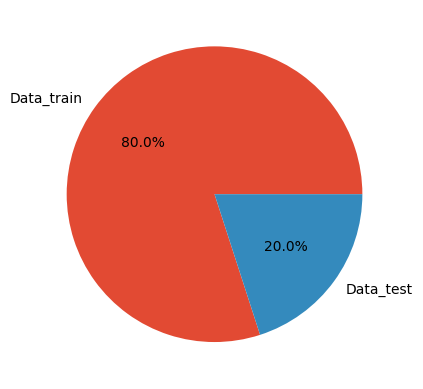

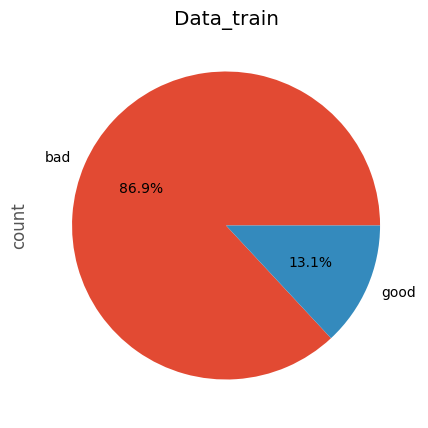

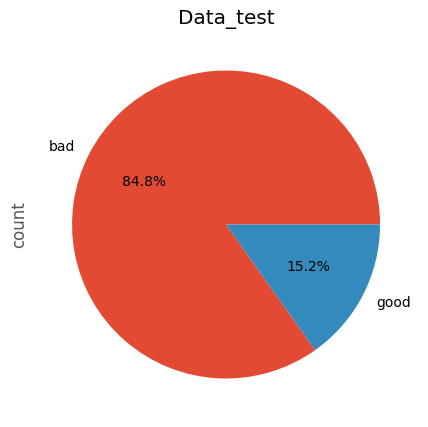

In [377]:
from sklearn.model_selection import train_test_split
Data_train , Data_test = train_test_split(df, test_size=0.2, random_state=0)
#chek if train_size==1-0.2 of all rows
plt.pie((Data_train.shape[0],Data_test.shape[0]), labels=('Data_train', 'Data_test'), autopct='%1.1f%%')
################################################(use it only for object target class )
#chek train['column_y'] class equilibre or not
plt.figure(figsize=(15,5))
plt.title('Data_train')
Data_train['quality'].value_counts().plot.pie(autopct='%1.1f%%')
#chek test['column_y'] class equilibre or not
plt.figure(figsize=(15,5))
plt.title('Data_test')
Data_test['quality'].value_counts().plot.pie(autopct='%1.1f%%')

In [378]:
from sklearn.preprocessing import StandardScaler
def prep(data):
    data = encodage(data)
    X = data.drop('quality',axis=1)
    y = data['quality']
    return X,y
X_train, y_train = prep(Data_train)
X_test, y_test = prep(Data_test)

dict_keys(['quality'])
classed found :  ['bad', 'good']
Updates dataframe is : 
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1322            9.1              0.34         0.42             1.8      0.058   
746             8.2              0.34         0.38             2.5      0.080   
801             8.6              0.55         0.09             3.3      0.068   
372             9.1              0.28         0.48             1.8      0.067   
376            11.5              0.45         0.50             3.0      0.078   
...             ...               ...          ...             ...        ...   
894             7.2              0.63         0.03             2.2      0.080   
986             9.8              0.34         0.39             1.4      0.066   
1444            7.3              0.67         0.02             2.2      0.072   
651             9.8              0.88         0.25             2.5      0.104   
797             9.3         

# [Step 7: Model Building (If Applicable):]()<a id="8"></a> <br>

- Train the model

In [379]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# [Step 8: Model Evaluation:]()<a id="9"></a> <br>
- Evaluate the model's performance on the testing set using relevant metrics.

In [380]:
score = model.score(X_test,y_test)
print(score)
y_pred = model.predict(X_test)

0.8074074074074075


accuracy_score :  0.8074074074074075
confusion_matrix :  [[202  27]
 [ 25  16]]
f1_score :  0.8074074074074074
classification_report :                precision    recall  f1-score   support

           0       0.89      0.88      0.89       229
           1       0.37      0.39      0.38        41

    accuracy                           0.81       270
   macro avg       0.63      0.64      0.63       270
weighted avg       0.81      0.81      0.81       270

recall_score :  [0.88209607 0.3902439 ]
precision_score :  [0.88986784 0.37209302]


<Axes: >

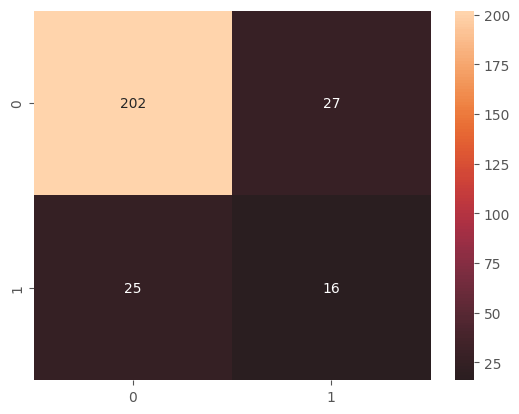

In [381]:
from sklearn.metrics import precision_score, accuracy_score,confusion_matrix, f1_score, recall_score, precision_recall_curve, classification_report

def scoring(y_test,y_pred):
    # Accuracy : acc= -((y-y_pred)**2/(y-y_mean)**2)  #this model describe in % the variation of y
    acc=accuracy_score(y_test, y_pred)        

    #best score is with Diagonal matrix   #visualisation of result               [[TP FP]
    cm = confusion_matrix(y_test, y_pred)                                        #[FN TN]]        

    # F1 Score : 2*(precision*recall)/(precision +recall) #average= can be : None,binary,micro,weighted,samples
    f1 = f1_score(y_test, y_pred, average='micro')         

    # Classification report :    #get (accuracy acc, score f1, cm)
    cr = classification_report(y_test,y_pred)

    # Recall Score : (Sensitivity) (TP / float(TP + FN)) == 1/1+2  #average= can be : None,binary,macro,weighted,samples
    rs = recall_score(y_test, y_pred, average=None)        

    # Precision Score : (Specificity) (TP / float(TP + FP))
    ps = precision_score(y_test, y_pred, average=None)
    return acc,cm,f1,cr,rs,ps
#compare (accuracy acc, score f1, cm)
scoring(y_test,y_pred)              
print("accuracy_score : " , scoring(y_test,y_pred)[0])
print("confusion_matrix : ",  scoring(y_test,y_pred)[1] )
print("f1_score : " , scoring(y_test,y_pred)[2] )
print("classification_report : " , scoring(y_test,y_pred)[3] )
print("recall_score : " , scoring(y_test,y_pred)[4] )
print("precision_score : " , scoring(y_test,y_pred)[5] )
#visualisation of result : best score is with Diagonal matrix
cm = scoring(y_test,y_pred)[1] 
sns.heatmap(cm, center=True, annot=True, fmt="d")   

# [Step 9: Make Pipline:]()<a id="10"></a> <br>

In [382]:

def prep2(data):
    # alwayse use it
    X = data.drop('quality',axis=1)
    y = data['quality']
    return X,y
X_train, y_train = prep2(Data_train)
X_test, y_test = prep2(Data_test)

In [383]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [384]:
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, StandardScaler,OneHotEncoder,LabelEncoder
#MinMaxScaler,[Normalizer(copy=True, norm=''l1'or'max'')modif suivant row,MaxAbsScaler(copy=True)modif suivant columns,FunctionTransformer(func=fun1 or lambda x: x**0.1,validate = True),Binarizer(threshold = 1.0),
from sklearn.impute import SimpleImputer,KNNImputer,MissingIndicator

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, make_union

# Use of all models in order to eliminate overfitting => RadForst, AdBoost, SVM, KNN 
num_features = [col for col in df.select_dtypes(exclude=['object']) if col != 'quality']
categ_features = [col for col in df.select_dtypes(include=['object'])if col != 'quality']
#Eliminate nan val+StandardScaler
num_pipeline_norm = make_pipeline(KNNImputer(),StandardScaler())
#pas besoin de normalisation (RobustScaler()) SimpleImputer(missing_values=np.nan, strategy='mean',fill_value=-9)
num_pipeline = make_pipeline(KNNImputer())
# strategy = 'most_frequent',mean,median,constant with fill_value=-99
categ_pipeline = make_pipeline(KNNImputer(),OneHotEncoder())

preprocessor_norm = make_column_transformer((num_pipeline_norm,num_features),(categ_pipeline,categ_features))
preprocessor = make_column_transformer((num_pipeline,num_features),(categ_pipeline,categ_features))
#Model Classificat#=================================#=========================================
import xgboost as xgb
mod_XGB = make_pipeline(preprocessor_norm,PolynomialFeatures(),xgb.XGBClassifier())
from sklearn.linear_model import LogisticRegression,SGDClassifier
mod_LOG = make_pipeline(preprocessor_norm,PolynomialFeatures(),LogisticRegression())
mod_SGD = make_pipeline(preprocessor_norm,PolynomialFeatures(),SGDClassifier(random_state=0))
from sklearn.svm import SVC
mod_SVM = make_pipeline(preprocessor_norm,PolynomialFeatures(), SVC(random_state=0))         #must use Scaling standard => -1< X_train <1 & mean=0 & std=1
from sklearn.tree import DecisionTreeClassifier
mod_tree = make_pipeline(preprocessor_norm,PolynomialFeatures(), DecisionTreeClassifier(random_state=0))  
from sklearn.neighbors import KNeighborsClassifier
mod_KNN = make_pipeline(preprocessor_norm,PolynomialFeatures(), KNeighborsClassifier())      #Scaling MinMax => 1< X_train <0   
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
mod_RadForst = make_pipeline(preprocessor_norm,PolynomialFeatures(),RandomForestClassifier(random_state=0))    
mod_Gradient = make_pipeline(preprocessor_norm,PolynomialFeatures(),GradientBoostingClassifier(random_state=0) )  
mod_AdBoost = make_pipeline(preprocessor_norm,PolynomialFeatures(),AdaBoostClassifier(random_state=0))

models = {'XGB':mod_XGB,'LOG':mod_LOG,'SGD':mod_SGD,'SVM':mod_SVM,'tree':mod_tree,'KNN':mod_KNN,'RadForst':mod_RadForst,'Gradient':mod_Gradient,'AdBoost':mod_AdBoost}
#Fitting #=================================#=========================================
for nam, model in models.items():
    print('result of model nam : ' , nam)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    #compare (accuracy acc, score f1, cm)
    scoring(y_test,y_pred)              
    print("accuracy_score : " , scoring(y_test,y_pred)[0])

result of model nam :  XGB


accuracy_score :  0.8555555555555555
result of model nam :  LOG
accuracy_score :  0.8740740740740741
result of model nam :  SGD
accuracy_score :  0.8629629629629629
result of model nam :  SVM
accuracy_score :  0.8592592592592593
result of model nam :  tree


c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score :  0.8148148148148148
result of model nam :  KNN
accuracy_score :  0.8555555555555555
result of model nam :  RadForst
accuracy_score :  0.8666666666666667
result of model nam :  Gradient
accuracy_score :  0.8592592592592593
result of model nam :  AdBoost
accuracy_score :  0.8666666666666667


In [385]:
mod_LOG

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  [])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression', LogisticRegression())])

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

0.8702498967368856
{'logisticregression__penalty': 'l2', 'polynomialfeatures__degree': 3}
accuracy_score :  0.8740740740740741
confusion_matrix :  [[219  10]
 [ 24  17]]
f1_score :  0.8740740740740742
classification_report :                precision    recall  f1-score   support

           0       0.90      0.96      0.93       229
           1       0.63      0.41      0.50        41

    accuracy                           0.87       270
   macro avg       0.77      0.69      0.71       270
weighted avg       0.86      0.87      0.86       270

recall_score :  [0.95633188 0.41463415]
precision_score :  [0.90123457 0.62962963]


<Axes: >

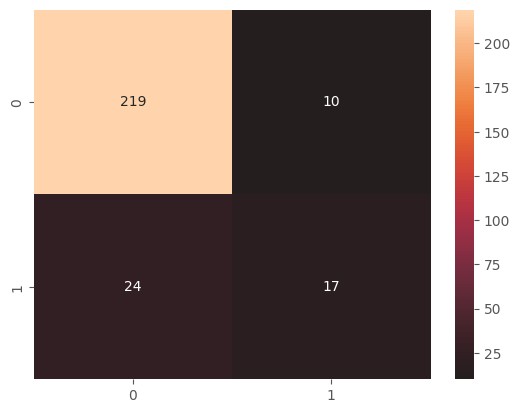

In [388]:
# Optimisation(hyperparametres) GridSearch :#=============================#========================
from sklearn.model_selection import GridSearchCV #or RandomizedSearchCV
hyper_params = {'polynomialfeatures__degree':[2,3,4], 'logisticregression__penalty':["l1","l2"]}     
grid = GridSearchCV(mod_LOG, hyper_params,cv=4).fit(X_train,y_train)    #cv=3ou4ou5 == ndr of split
# grid = RandomizedSearchCV(mod_SVM, hyper_params, scoring='recall',cv=4, n_iter=40).fit(X_train,y_train)   #n_iter == 40 iteration by chance
print(grid.best_score_)                      #get best score in GridSearchCV
print(grid.best_params_)                     #get best parametres
model_grid = grid.best_estimator_            #get best model
# 'Fit :
model_grid.fit(X_train,y_train)
y_pred = model_grid.predict(X_test)
# 'Classification_report:
#compare (accuracy acc, score f1, cm)
scoring(y_test,y_pred)              
print("accuracy_score : " , scoring(y_test,y_pred)[0])
print("confusion_matrix : ",  scoring(y_test,y_pred)[1] )
print("f1_score : " , scoring(y_test,y_pred)[2] )
print("classification_report : " , scoring(y_test,y_pred)[3] )
print("recall_score : " , scoring(y_test,y_pred)[4] )
print("precision_score : " , scoring(y_test,y_pred)[5] )
#visualisation of result : best score is with Diagonal matrix
cm = scoring(y_test,y_pred)[1] 
sns.heatmap(cm, center=True, annot=True, fmt="d")  